In [283]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn import metrics 
from scipy.stats import boxcox
from scipy.stats import skew

In [284]:
import warnings
warnings.filterwarnings('ignore')

In [285]:
df=pd.read_csv('training_dataset.csv')
df1=pd.read_csv('testing_dataset.csv')

In [286]:
df = df.apply(lambda x: np.where(x <= -1, 0, x))
df1 = df1.apply(lambda x: np.where(x <= -1, 0, x))

In [287]:
df.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1.0,2.0,0.0,892.0,0.0,0.0,0.0,0.0,0.0,1.0
1,5,0,1,3,0,3,0,2,0,0,...,1.0,2.0,1.0,9540.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2,0,0,1,0,0,0,0,0,0,...,1.0,2.0,3.0,589.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,0,2,5,0,0,0,0,0,0,...,1.0,2.0,0.0,292.0,1.0,0.0,0.0,0.0,0.0,1.0
4,2,0,0,0,0,0,0,0,0,0,...,1.0,2.0,1.0,3597.0,0.0,1.0,0.0,0.0,0.0,0.0


In [288]:
df.describe(include='all')

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,58771.000000,58771.000000,58771.000000,58771.000000,58771.000000,58771.000000,58771.000000,58771.000000,58771.000000,58771.000000,...,58770.000000,58770.000000,58770.000000,58770.000000,58769.000000,58769.000000,58769.000000,58769.000000,58769.000000,58769.000000
mean,2.192833,0.332511,0.114002,1.283745,0.009205,0.207824,0.021984,0.141532,0.002705,0.001174,...,1.183274,2.771873,1.740599,6206.704781,0.505828,0.420936,0.002127,0.002910,0.005207,0.345675
std,1.226152,1.122754,0.644794,1.895223,0.116819,0.962454,0.255469,0.925622,0.077014,0.075265,...,0.794502,1.319455,1.706185,12087.116093,0.499970,0.692799,0.046070,0.053864,0.071971,0.475592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,2100.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,4.000000,2.000000,10799.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,23.000000,35.000000,21.000000,44.000000,9.000000,23.000000,43.000000,26.000000,10.000000,9.000000,...,24.000000,20.000000,20.000000,604800.000000,1.000000,17.000000,1.000000,1.000000,1.000000,1.000000


In [289]:
df=df.fillna(0)
df1=df1.fillna(0)

In [290]:
# List of important features for phishing detection
useful_columns = [
    # Length Features (5)
    "length_url",  # Total URL length is often longer in phishing URLs
    "domain_length",  # Phishing domains may have unusual lengths
    "directory_length",  # Phishing URLs may have longer directories
    "params_length",  # Phishing URLs often have more parameters
    "qty_tld_url",  # Phishing URLs may use uncommon TLDs

    # URL Character Counts (6)
    "qty_dot_url",  # Phishing URLs may have more dots
    "qty_hyphen_url",  # Hyphens are often used in phishing domains
    "qty_slash_url",  # Phishing URLs may have more slashes
    "qty_questionmark_url",  # Phishing URLs often have more query parameters
    "qty_equal_url",  # Phishing URLs may have more key-value pairs
    "qty_and_url",  # Phishing URLs may have more parameters separated by &

    # Domain Character Counts (5)
    "qty_dot_domain",  # Phishing domains may have more subdomains
    "qty_hyphen_domain",  # Hyphens are common in phishing domains
    "qty_at_domain",  # "@" in the domain is suspicious
    "qty_vowels_domain",  # Phishing domains may have fewer vowels
    "qty_percent_domain",  # Percent signs are rare in legitimate domains

    # Directory Character Counts (4)
    "qty_dot_directory",  # Dots in directories are suspicious
    "qty_hyphen_directory",  # Hyphens in directories are suspicious
    "qty_equal_directory",  # "=" in directories is suspicious
    "directory_length",  # Long directories are suspicious

    # File Character Counts (3)
    "qty_dot_file",  # Multiple dots in filenames are suspicious
    "qty_equal_file",  # "=" in filenames is suspicious
    "file_length",  # Long filenames are suspicious

    # Params Character Counts (4)
    "qty_dot_params",  # Dots in parameters are suspicious
    "qty_equal_params",  # More key-value pairs are suspicious
    "qty_at_params",  # "@" in parameters is suspicious
    "params_length",  # Long parameters are suspicious

    # Additional Simple Features (3)
    "domain_in_ip",  # IP instead of domain is suspicious
    "email_in_url",  # Email in URL is suspicious
    "url_shortened",  # Shortened URLs are often used in phishing
    "phishing"
]

# Drop other columns from the DataFrame
df = df[useful_columns]
df1=df1[useful_columns]

In [291]:
for skewness in df.columns:
    print(f"The skewness of {skewness} is : {df[skewness].skew()}")


The skewness of length_url is : 17.363426022321896
The skewness of domain_length is : 3.359084303846373
The skewness of directory_length is : directory_length    11.708134
directory_length    11.708134
dtype: float64
The skewness of params_length is : params_length    33.054987
params_length    33.054987
dtype: float64
The skewness of qty_tld_url is : 6.7252611574189185
The skewness of qty_dot_url is : 5.424087308785798
The skewness of qty_hyphen_url is : 7.83030160293341
The skewness of qty_slash_url is : 2.115148699649228
The skewness of qty_questionmark_url is : 27.119790283048804
The skewness of qty_equal_url is : 7.409361554626316
The skewness of qty_and_url is : 9.594164343429846
The skewness of qty_dot_domain is : 2.4772404608766045
The skewness of qty_hyphen_domain is : 5.775332185274915
The skewness of qty_at_domain is : 0.0
The skewness of qty_vowels_domain is : 1.384036705774408
The skewness of qty_percent_domain is : 0.0
The skewness of qty_dot_directory is : 6.051178721073

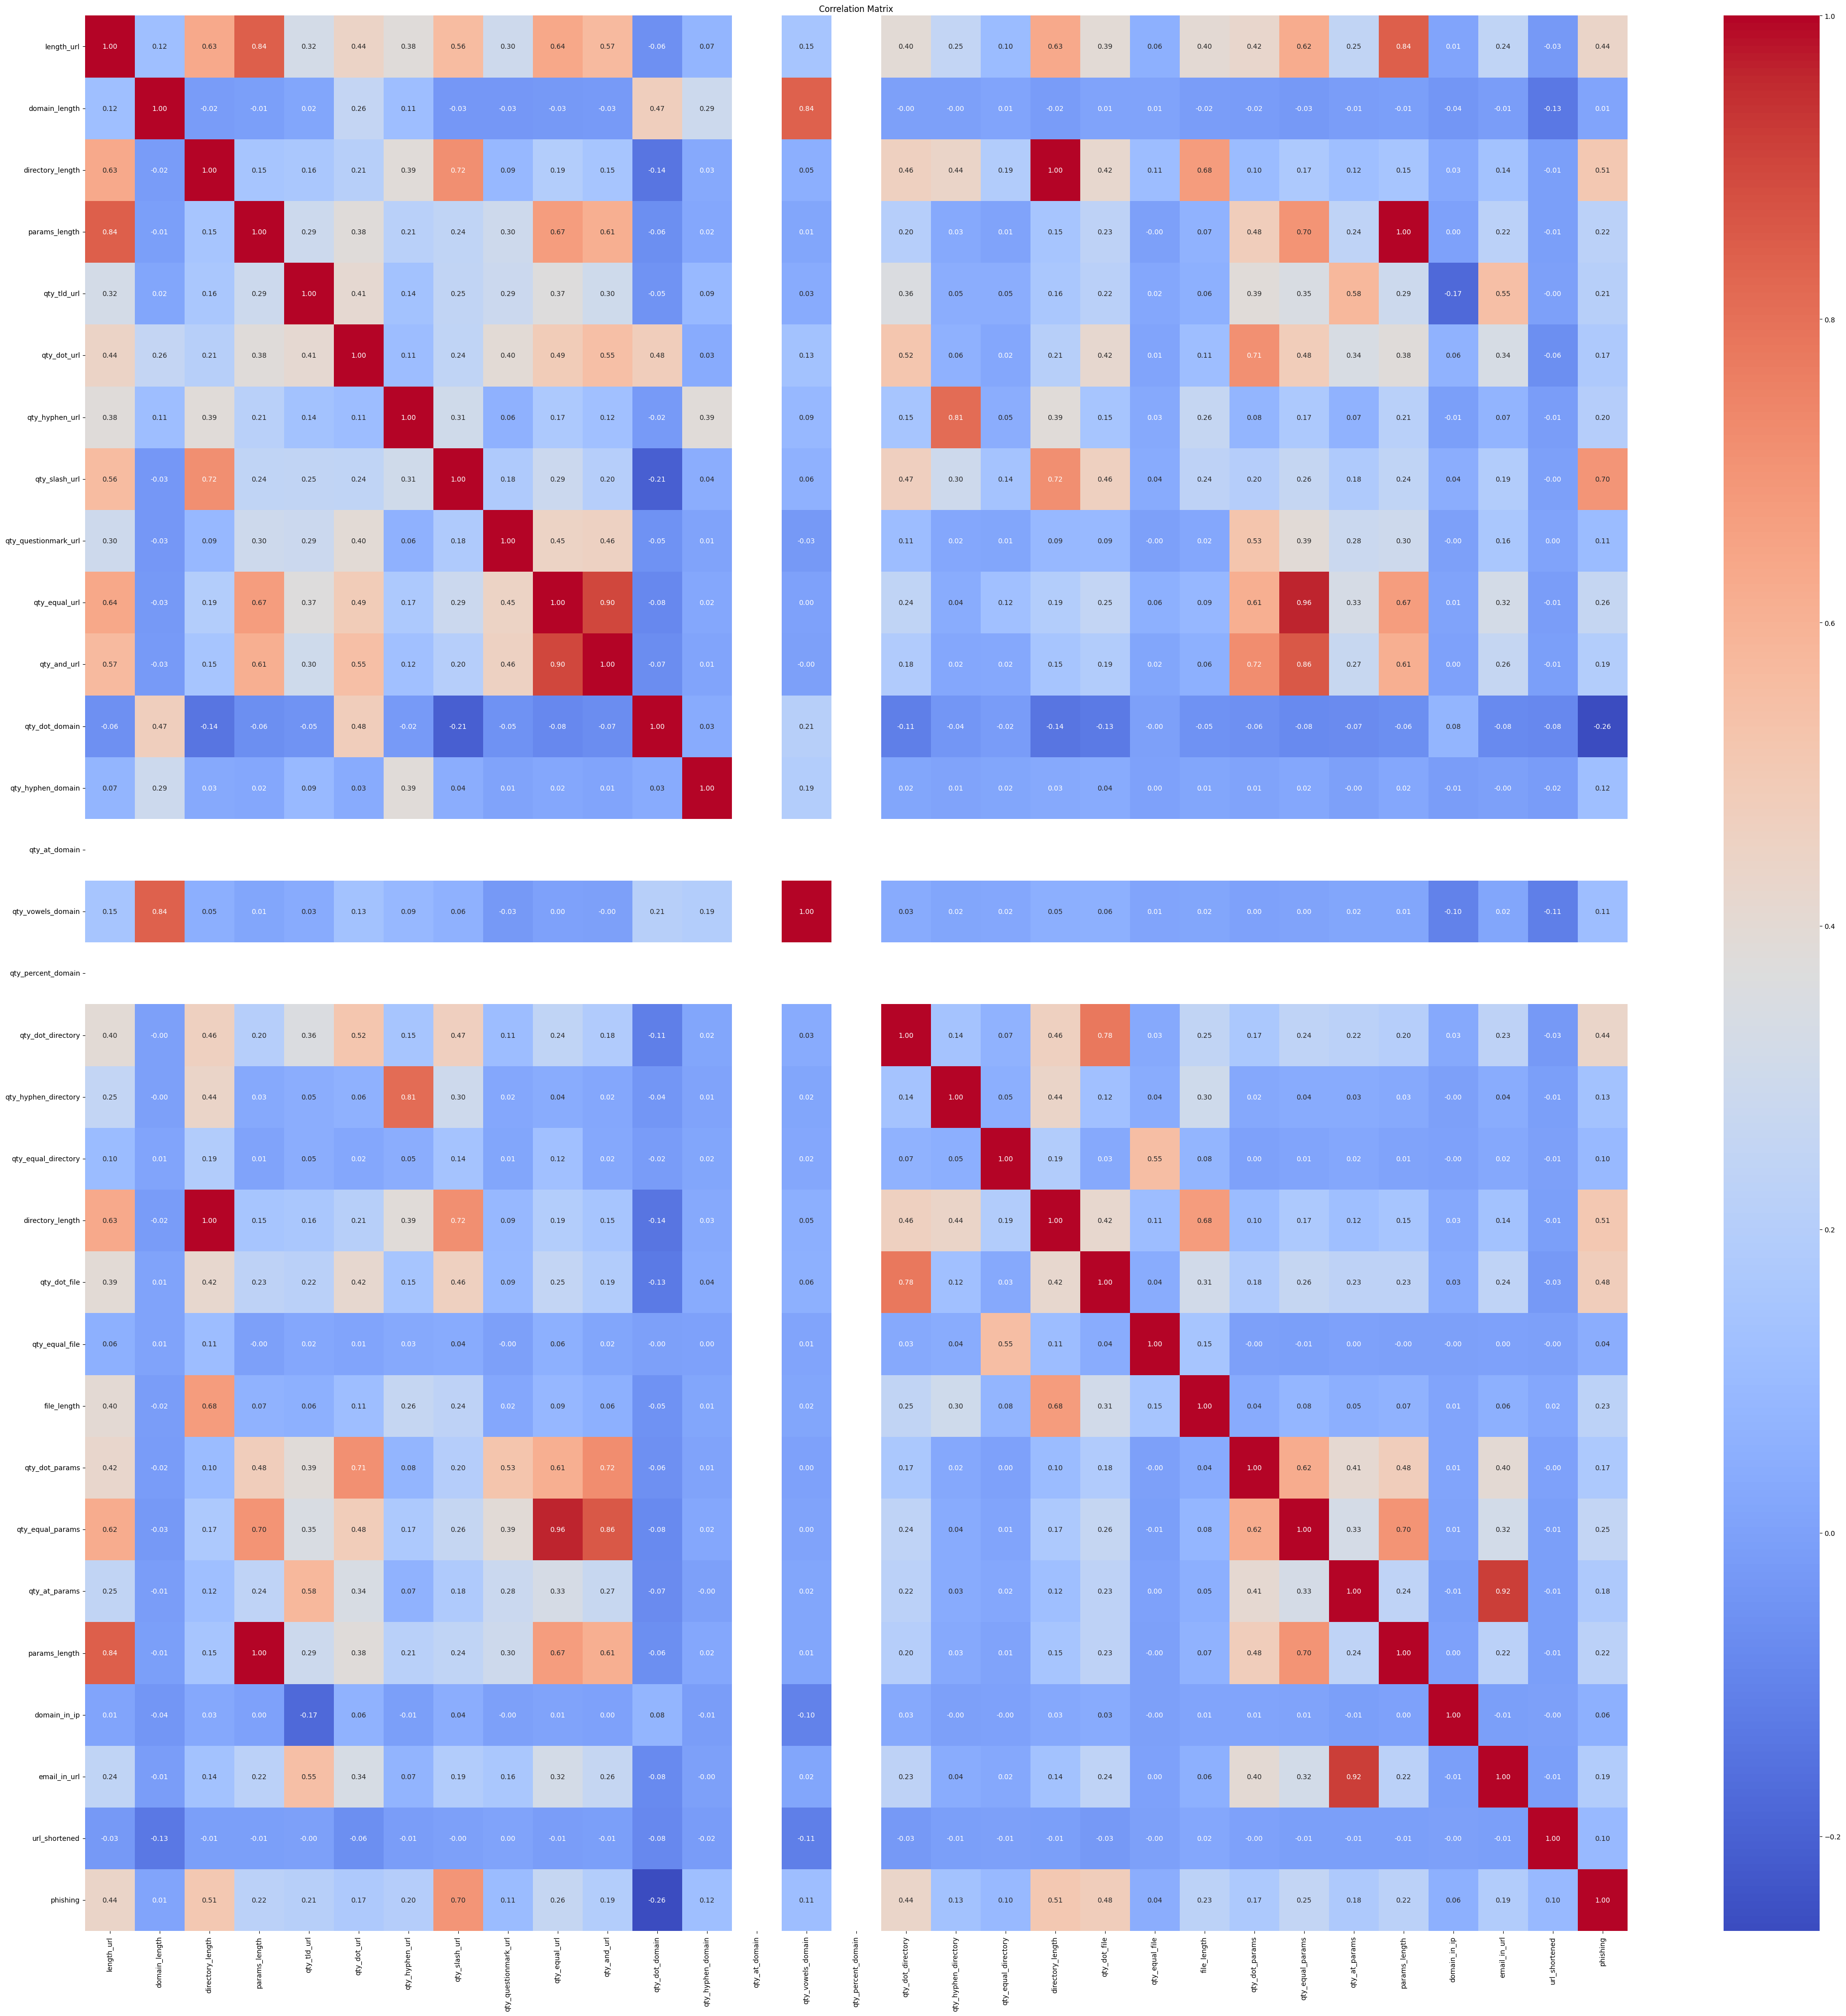

In [292]:
plt.figure(figsize=(50, 50))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [293]:
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]

# Detect outliers for each feature
outliers = {}
for feature in useful_columns:
    if feature != "phishing":  # Skip the target column
        outliers[feature] = detect_outliers_iqr(df[feature])
        print(f"Outliers in {feature}: {len(outliers[feature])}")

Outliers in length_url: 5371
Outliers in domain_length: 911
Outliers in directory_length: 58771
Outliers in params_length: 58771
Outliers in qty_tld_url: 2749
Outliers in qty_dot_url: 23161
Outliers in qty_hyphen_url: 10424
Outliers in qty_slash_url: 2329
Outliers in qty_questionmark_url: 480
Outliers in qty_equal_url: 4884
Outliers in qty_and_url: 2547
Outliers in qty_dot_domain: 1226
Outliers in qty_hyphen_domain: 5423
Outliers in qty_at_domain: 0
Outliers in qty_vowels_domain: 1036
Outliers in qty_percent_domain: 0
Outliers in qty_dot_directory: 10207
Outliers in qty_hyphen_directory: 4971
Outliers in qty_equal_directory: 364
Outliers in directory_length: 58771
Outliers in qty_dot_file: 9530
Outliers in qty_equal_file: 75
Outliers in file_length: 14381
Outliers in qty_dot_params: 2126
Outliers in qty_equal_params: 4503
Outliers in qty_at_params: 1054
Outliers in params_length: 58771
Outliers in domain_in_ip: 134
Outliers in email_in_url: 1093
Outliers in url_shortened: 306


In [294]:
def impute_outliers(data, column):
    Q1 = data[column].quantile(0.10)
    Q3 = data[column].quantile(0.85)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = data[column].mean()
    data[column] = np.where((data[column] < lower_bound) | (data[column] > upper_bound), median, data[column])
    return data

columns_to_check = [   # Length Features (5)
    "length_url",  # Total URL length is often longer in phishing URLs
    "domain_length",  # Phishing domains may have unusual lengths
    "directory_length",  # Phishing URLs may have longer directories
    "params_length",  # Phishing URLs often have more parameters
    "qty_tld_url",  # Phishing URLs may use uncommon TLDs

    # URL Character Counts (6)
    "qty_dot_url",  # Phishing URLs may have more dots
    "qty_hyphen_url",  # Hyphens are often used in phishing domains
    "qty_slash_url",  # Phishing URLs may have more slashes
    "qty_questionmark_url",  # Phishing URLs often have more query parameters
    "qty_equal_url",  # Phishing URLs may have more key-value pairs
    "qty_and_url",  # Phishing URLs may have more parameters separated by &

    # Domain Character Counts (5)
    "qty_dot_domain",  # Phishing domains may have more subdomains
    "qty_hyphen_domain",  # Hyphens are common in phishing domains
    "qty_at_domain",  # "@" in the domain is suspicious
    "qty_vowels_domain",  # Phishing domains may have fewer vowels
    "qty_percent_domain",  # Percent signs are rare in legitimate domains

    # Directory Character Counts (4)
    "qty_dot_directory",  # Dots in directories are suspicious
    "qty_hyphen_directory",  # Hyphens in directories are suspicious
    "qty_equal_directory",  # "=" in directories is suspicious
    "directory_length",  # Long directories are suspicious

    # File Character Counts (3)
    "qty_dot_file",  # Multiple dots in filenames are suspicious
    "qty_equal_file",  # "=" in filenames is suspicious
    "file_length",  # Long filenames are suspicious

    # Params Character Counts (4)
    "qty_dot_params",  # Dots in parameters are suspicious
    "qty_equal_params",  # More key-value pairs are suspicious
    "qty_at_params",  # "@" in parameters is suspicious
    "params_length",  # Long parameters are suspicious

    # Additional Simple Features (3)
    "domain_in_ip",  # IP instead of domain is suspicious
    "email_in_url",  # Email in URL is suspicious
    "url_shortened"]
data=df.copy()
for column in columns_to_check:
    data = impute_outliers(data, column)

df=data

In [295]:
for skewness in df.columns:
    print(f"The skewness of {skewness} is : {df[skewness].skew()}")


The skewness of length_url is : 1.8545521748214302
The skewness of domain_length is : 0.6051725314533446
The skewness of directory_length is : directory_length    1.765893
directory_length    1.765893
dtype: float64
The skewness of params_length is : params_length    2.999792
params_length    2.999792
dtype: float64
The skewness of qty_tld_url is : 4.29290783164926
The skewness of qty_dot_url is : 1.3206299615823305
The skewness of qty_hyphen_url is : 2.520130485901786
The skewness of qty_slash_url is : 1.4340190087473361
The skewness of qty_questionmark_url is : 10.92949749260896
The skewness of qty_equal_url is : 3.0206744527575444
The skewness of qty_and_url is : 4.485635471527981
The skewness of qty_dot_domain is : -0.032921818313635255
The skewness of qty_hyphen_domain is : 2.817697279772607
The skewness of qty_at_domain is : 0.0
The skewness of qty_vowels_domain is : 0.5471776337842258
The skewness of qty_percent_domain is : 0.0
The skewness of qty_dot_directory is : 2.2139608454

In [296]:
for skewness in df.columns:
    print(f"The skewness of {skewness} is : {df[skewness].skew()}")


The skewness of length_url is : 1.8545521748214302
The skewness of domain_length is : 0.6051725314533446
The skewness of directory_length is : directory_length    1.765893
directory_length    1.765893
dtype: float64
The skewness of params_length is : params_length    2.999792
params_length    2.999792
dtype: float64
The skewness of qty_tld_url is : 4.29290783164926
The skewness of qty_dot_url is : 1.3206299615823305
The skewness of qty_hyphen_url is : 2.520130485901786
The skewness of qty_slash_url is : 1.4340190087473361
The skewness of qty_questionmark_url is : 10.92949749260896
The skewness of qty_equal_url is : 3.0206744527575444
The skewness of qty_and_url is : 4.485635471527981
The skewness of qty_dot_domain is : -0.032921818313635255
The skewness of qty_hyphen_domain is : 2.817697279772607
The skewness of qty_at_domain is : 0.0
The skewness of qty_vowels_domain is : 0.5471776337842258
The skewness of qty_percent_domain is : 0.0
The skewness of qty_dot_directory is : 2.2139608454

In [297]:
df.head()

,length_url,domain_length,directory_length,params_length,qty_tld_url,qty_dot_url,qty_hyphen_url,qty_slash_url,qty_questionmark_url,qty_equal_url,...,qty_equal_file,file_length,qty_dot_params,qty_equal_params,qty_at_params,params_length,domain_in_ip,email_in_url,url_shortened,phishing
0,25.000000,17.0,8.0,0.000000,1.000000,3.0,0.0,1.0,0.0,0.000000,...,0.0,7.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,1.0
1,36.378486,16.0,42.0,0.520203,1.047251,5.0,0.0,3.0,0.0,0.207824,...,0.0,9.0,0.0,0.19023,0.0,0.520203,0.0,0.0,0.0,1.0
2,15.000000,14.0,1.0,0.000000,1.000000,2.0,0.0,1.0,0.0,0.000000,...,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0
3,81.000000,19.0,62.0,0.000000,1.000000,4.0,0.0,5.0,0.0,0.000000,...,0.0,9.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,1.0
4,19.000000,19.0,0.0,0.000000,1.000000,2.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0


In [298]:
df1.columns

Index(['length_url', 'domain_length', 'directory_length', 'params_length',
       'qty_tld_url', 'qty_dot_url', 'qty_hyphen_url', 'qty_slash_url',
       'qty_questionmark_url', 'qty_equal_url', 'qty_and_url',
       'qty_dot_domain', 'qty_hyphen_domain', 'qty_at_domain',
       'qty_vowels_domain', 'qty_percent_domain', 'qty_dot_directory',
       'qty_hyphen_directory', 'qty_equal_directory', 'directory_length',
       'qty_dot_file', 'qty_equal_file', 'file_length', 'qty_dot_params',
       'qty_equal_params', 'qty_at_params', 'params_length', 'domain_in_ip',
       'email_in_url', 'url_shortened', 'phishing'],
      dtype='object')

In [299]:

# Creating holders to store the model performance results
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

In [300]:
x_train=df.drop(['phishing'],axis=1).values
y_train=df['phishing'].values

In [301]:
x_test=df1.drop(['phishing'],axis=1).values
y_test=df1['phishing'].values

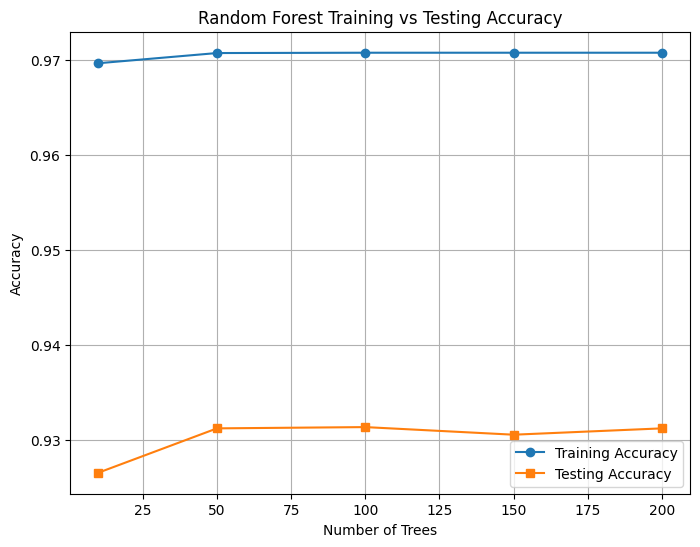

In [302]:
# Lists to store accuracy
n_estimators = [10, 50, 100, 150, 200]
train_accuracies = []
test_accuracies = []

# Train Random Forest with varying number of trees
for n in n_estimators:
    rf = RandomForestClassifier(n_estimators=n, oob_score=True, random_state=42, bootstrap=True)
    rf.fit(x_train, y_train)
    
    # Accuracy on training and test sets
    train_acc = accuracy_score(y_train, rf.predict(x_train))
    test_acc = accuracy_score(y_test, rf.predict(x_test))
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(n_estimators, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(n_estimators, test_accuracies, label='Testing Accuracy', marker='s')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Random Forest Training vs Testing Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [303]:
RF=RandomForestClassifier(n_estimators=200,random_state=42)
RF_Model=RF.fit(x_train,y_train)

In [304]:
y_test.shape

(14999,)

In [305]:
y_pred=RF_Model.predict(x_test)

In [306]:
y_train_forest = RF_Model.predict(x_train)

In [307]:
y_pred.shape

(14999,)

In [308]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      9794
           1       0.91      0.89      0.90      5205

    accuracy                           0.93     14999
   macro avg       0.93      0.92      0.92     14999
weighted avg       0.93      0.93      0.93     14999



In [309]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_pred)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_pred)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_pred)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_pred)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))

Random Forest : Accuracy on training Data: 0.971
Random Forest : Accuracy on test Data: 0.931

Random Forest : f1_score on training Data: 0.957
Random Forest : f1_score on test Data: 0.900

Random Forest : Recall on training Data: 0.932
Random Forest : Recall on test Data: 0.892

Random Forest : precision on training Data: 0.983
Random Forest : precision on test Data: 0.908


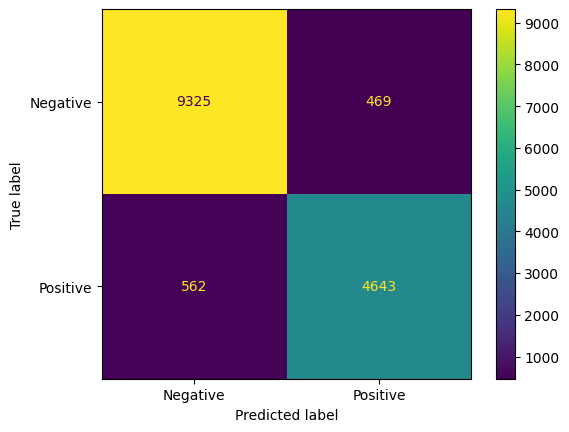

In [310]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot()

In [311]:
with open("phishing_detection_model.pkl", "wb") as file:
    pickle.dump(RF_Model, file)
print("Model saved successfully!")

Model saved successfully!


In [312]:
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(n_estimators=100,random_state=42)

# fit the model 
XG_Model= xgb.fit(x_train,y_train)

In [313]:

#predicting the target value from the model for the samples
y_train_xgb = xgb.predict(x_train)
y_test_xgb = xgb.predict(x_test)

In [314]:
report = classification_report(y_test, y_test_xgb)

print(report)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      9794
           1       0.90      0.89      0.90      5205

    accuracy                           0.93     14999
   macro avg       0.92      0.92      0.92     14999
weighted avg       0.93      0.93      0.93     14999



In [315]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_xgb = metrics.accuracy_score(y_train,y_train_xgb)
acc_test_xgb = metrics.accuracy_score(y_test,y_test_xgb)
print("XGBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_xgb))
print()

f1_score_train_xgb = metrics.f1_score(y_train,y_train_xgb)
f1_score_test_xgb = metrics.f1_score(y_test,y_test_xgb)
print("XGBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_xgb))
print("XGBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_xgb))
print()

recall_score_train_xgb = metrics.recall_score(y_train,y_train_xgb)
recall_score_test_xgb = metrics.recall_score(y_test,y_test_xgb)
print("XGBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_xgb))
print("XGBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_train_xgb))
print()

precision_score_train_xgb = metrics.precision_score(y_train,y_train_xgb)
precision_score_test_xgb = metrics.precision_score(y_test,y_test_xgb)
print("XGBoost Classifier : precision on training Data: {:.3f}".format(precision_score_train_xgb))
print("XGBoost Classifier : precision on test Data: {:.3f}".format(precision_score_train_xgb))

XGBoost Classifier : Accuracy on training Data: 0.946
XGBoost Classifier : Accuracy on test Data: 0.929

XGBoost Classifier : f1_score on training Data: 0.921
XGBoost Classifier : f1_score on test Data: 0.897

XGBoost Classifier : Recall on training Data: 0.906
XGBoost Classifier : Recall on test Data: 0.906

XGBoost Classifier : precision on training Data: 0.937
XGBoost Classifier : precision on test Data: 0.937


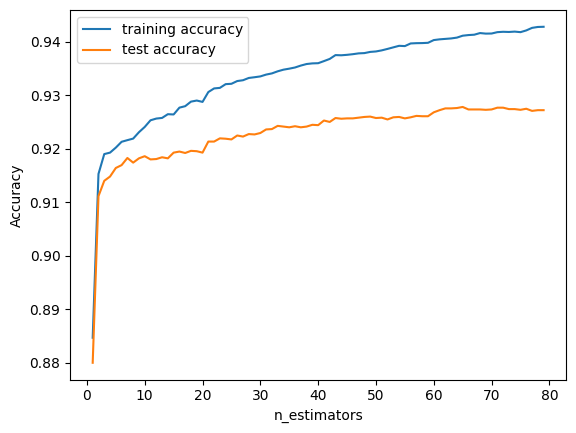

In [316]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,80)
for n in depth:
    xgb_test =  XGBClassifier(n_estimators=n)

    xgb_test.fit(x_train, y_train)
    # record training set accuracy
    training_accuracy.append(xgb_test.score(x_train, y_train))
    # record generalization accuracy
    test_accuracy.append(xgb_test.score(x_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend()

In [317]:

#storing the results. The below mentioned order of parameter passing is important.

storeResults('Random Forest',acc_test_forest,f1_score_test_forest,
             recall_score_train_forest,precision_score_train_forest)

In [318]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('XGBoost Classifier',acc_test_xgb,f1_score_test_xgb,
             recall_score_train_xgb,precision_score_train_xgb)

In [319]:
# Train model using naive bayes classifier
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
NB_Model = nb.fit(x_train, y_train)


In [320]:
#predicting the target value from the model for the samples
y_train_naive = nb.predict(x_train)
y_test_naive = nb.predict(x_test)


In [321]:
report = classification_report(y_test, y_test_naive)

print(report)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      9794
           1       0.76      0.73      0.75      5205

    accuracy                           0.83     14999
   macro avg       0.81      0.81      0.81     14999
weighted avg       0.83      0.83      0.83     14999



In [322]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_naive = metrics.accuracy_score(y_train,y_train_naive)
acc_test_naive = metrics.accuracy_score(y_test,y_test_naive)
print("Naive Bayes Classifier : Accuracy on training Data: {:.3f}".format(acc_train_naive))
print("Naive Bayes Classifier : Accuracy on test Data: {:.3f}".format(acc_test_naive))
print()

f1_score_train_naive = metrics.f1_score(y_train,y_train_naive)
f1_score_test_naive = metrics.f1_score(y_test,y_test_naive)
print("Naive Bayes Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_naive))
print("Naive Bayes Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_naive))
print()

recall_score_train_naive = metrics.recall_score(y_train,y_train_naive)
recall_score_test_naive = metrics.recall_score(y_test,y_test_naive)
print("Naive Bayes Classifier : Recall on training Data: {:.3f}".format(recall_score_train_naive))
print("Naive Bayes Classifier : Recall on test Data: {:.3f}".format(recall_score_train_naive))
print()

precision_score_train_naive = metrics.precision_score(y_train,y_train_naive)
precision_score_test_naive = metrics.precision_score(y_test,y_test_naive)
print("Naive Bayes Classifier : precision on training Data: {:.3f}".format(precision_score_train_naive))
print("Naive Bayes Classifier : precision on test Data: {:.3f}".format(precision_score_train_naive))

Naive Bayes Classifier : Accuracy on training Data: 0.852
Naive Bayes Classifier : Accuracy on test Data: 0.828

Naive Bayes Classifier : f1_score on training Data: 0.763
Naive Bayes Classifier : f1_score on test Data: 0.748

Naive Bayes Classifier : Recall on training Data: 0.689
Naive Bayes Classifier : Recall on test Data: 0.689

Naive Bayes Classifier : precision on training Data: 0.854
Naive Bayes Classifier : precision on test Data: 0.854


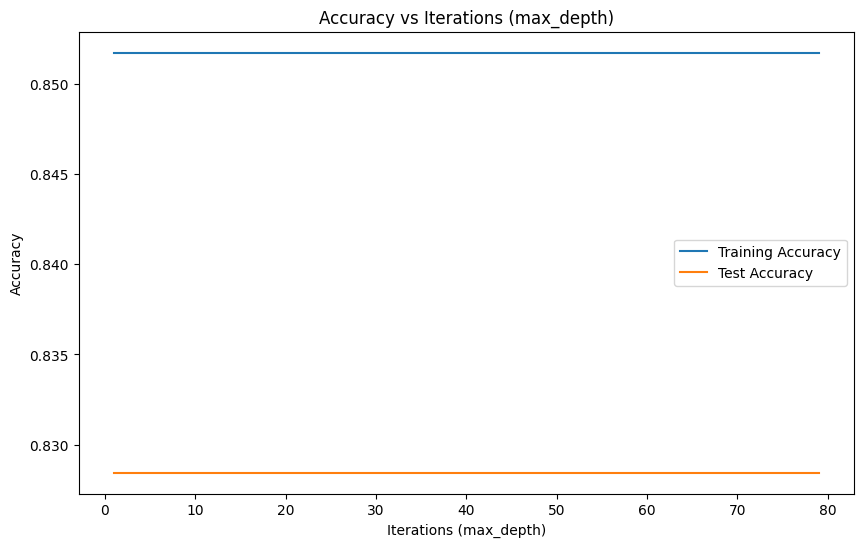

In [323]:
# Initialize lists for accuracies
training_accuracy = []
test_accuracy = []

# Try varying the 'max_depth' from 1 to 80 (adjust range as needed)
depth = range(1, 80)

for n in depth:
    gaussian_test = GaussianNB()

    # Fit the model
    gaussian_test.fit(x_train, y_train)

    # Record training accuracy
    training_accuracy.append(gaussian_test.score(x_train, y_train))

    # Record test accuracy
    test_accuracy.append(gaussian_test.score(x_test, y_test))

# Plotting the training & testing accuracy
plt.figure(figsize=(10, 6))
plt.plot(depth, training_accuracy, label="Training Accuracy")
plt.plot(depth, test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Iterations (max_depth)")
plt.legend()
plt.title("Accuracy vs Iterations (max_depth)")
plt.show()

In [324]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Naive Bayes Classifier',acc_test_naive,f1_score_test_naive,
             recall_score_train_naive,precision_score_train_naive)

In [325]:

#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })

In [326]:
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Random Forest,0.931,0.900,0.932,0.983
1,XGBoost Classifier,0.929,0.897,0.906,0.937
2,Naive Bayes Classifier,0.828,0.748,0.689,0.854
